<a href="https://colab.research.google.com/github/glorivaas/Machine_Learning25/blob/main/Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment 12: Is a *queen* really just a *king*, minus a *man*, plus a *woman*?**

###**AUTHOR**: Gloria Rivas

#1. Preparing the exercise

In [1]:
!pip install -q gensim

import gensim.downloader as api
from gensim.models import KeyedVectors

word_vectors = api.load("glove-wiki-gigaword-300")

print("Vocabulary size:", len(word_vectors))
print("Vector dimension:", word_vectors.vector_size)


[==================================================] 100.0% 376.1/376.1MB downloaded
Vocabulary size: 400000
Vector dimension: 300


In [9]:

semantic_classes = {
    "gender": [
        ("king", "queen"),
        ("man", "woman"),
        ("prince", "princess"),
        ("husband", "wife"),
        ("father", "mother"),
    ],
    "verb_tense": [
        ("run", "ran"),
        ("eat", "ate"),
        ("swim", "swam"),
        ("write", "wrote"),
        ("sing", "sang"),
    ],
    "singular_plural": [
        ("dog", "dogs"),
        ("person", "people"),
        ("child", "children"),
        ("mouse", "mice"),
        ("foot", "feet"),
    ],
    "comparative": [
        ("old", "older"),
        ("big", "bigger"),
        ("tall", "taller"),
        ("rich", "richer"),
        ("dark", "darker"),
    ],
    "superlative": [
        ("good", "best"),
        ("kind", "kindest"),
        ("long", "longest"),
        ("short", "shortest"),
        ("smart", "smartest"),
    ],
    "country_capital": [
        ("france", "paris"),
        ("germany", "berlin"),
        ("italy", "rome"),
        ("spain", "madrid"),
        ("japan", "tokyo"),
    ],
    "tool_user": [
        ("hammer", "carpenter"),
        ("scalpel", "surgeon"),
        ("pen", "writer"),
        ("camera", "photographer"),
        ("microscope", "scientist"),
    ],
    "job_object": [
        ("chef", "knife"),
        ("painter", "brush"),
        ("driver", "car"),
        ("gardener", "shovel"),
        ("teacher", "book"),
    ],
    "animal_sound": [
        ("lion", "roar"),
        ("cow", "moo"),
        ("duck", "quack"),
        ("sheep", "bleat"),
        ("owl", "hoot"),
    ],
    "emotion_color": [
        ("anger", "red"),
        ("jealousy", "green"),
        ("sadness", "blue"),
        ("happiness", "yellow"),
        ("fear", "black"),
    ]
}



import numpy as np

all_words = set(word for pairs in semantic_classes.values() for pair in pairs for word in pair)
embeddings = {}
missing_words = []

for word in all_words:
    if word in word_vectors:
        embeddings[word] = word_vectors[word]
    else:
        missing_words.append(word)

print(f"Loaded {len(embeddings)} embeddings. Missing: {missing_words}")


Loaded 100 embeddings. Missing: []


# 2. Global PCA (Across All Words)

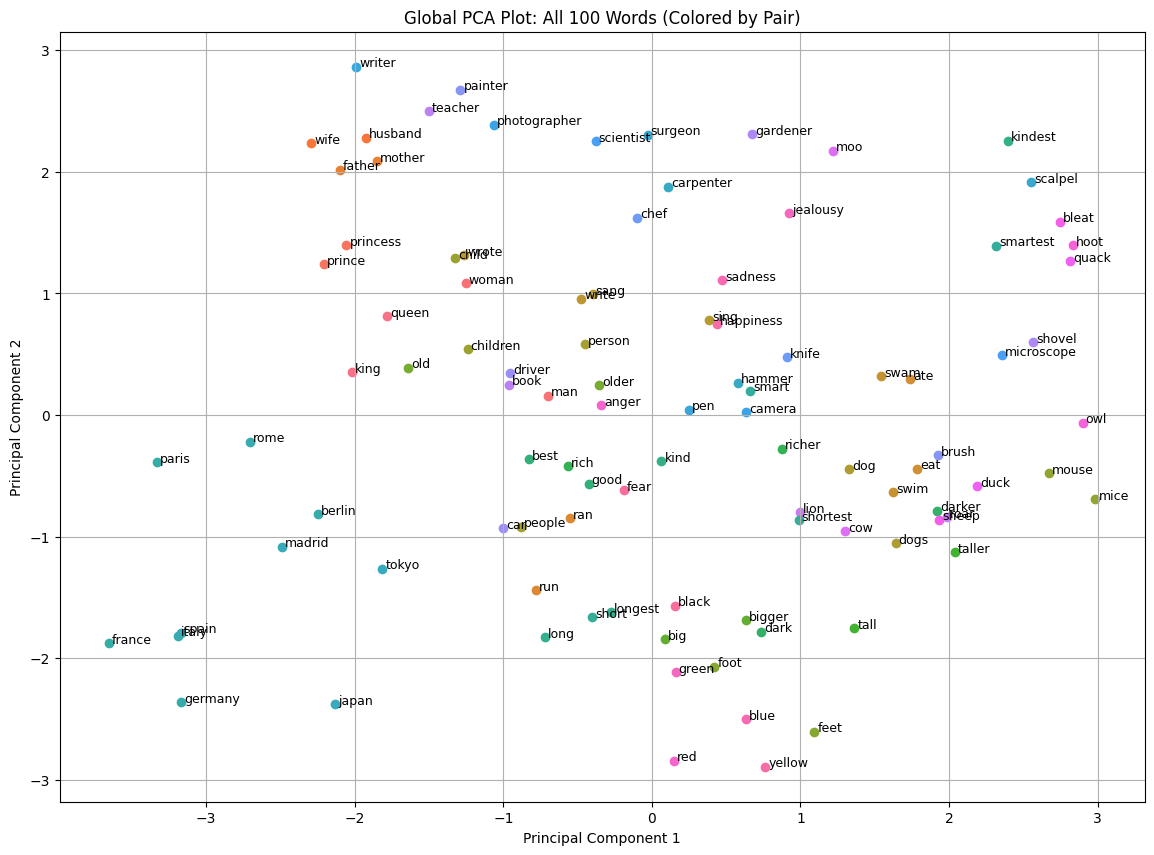

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

all_pairs = [pair for pairs in semantic_classes.values() for pair in pairs]

pair_colors = sns.color_palette("husl", len(all_pairs))
word_to_pair_color = {}
for i, (w1, w2) in enumerate(all_pairs):
    word_to_pair_color[w1] = pair_colors[i]
    word_to_pair_color[w2] = pair_colors[i]

plt.figure(figsize=(14, 10))
for word in word_list:
    x, y = word_to_pca[word]
    plt.scatter(x, y, color=word_to_pair_color[word])
    plt.text(x + 0.02, y, word, fontsize=9)
plt.title("Global PCA Plot: All 100 Words (Colored by Pair)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()



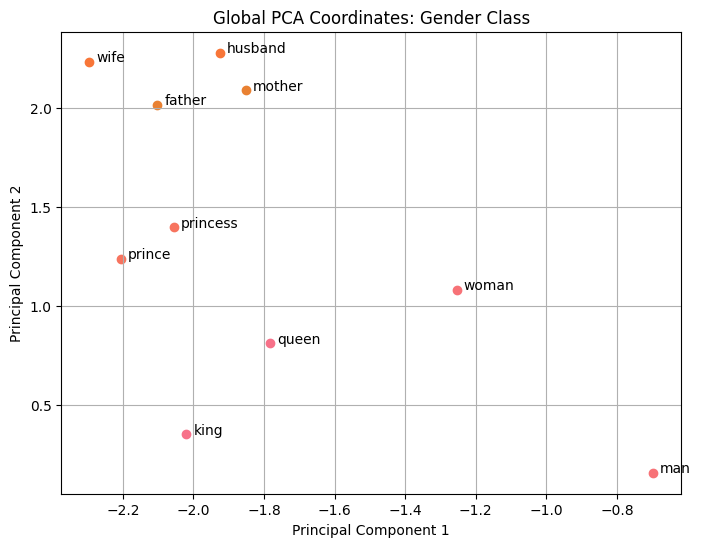

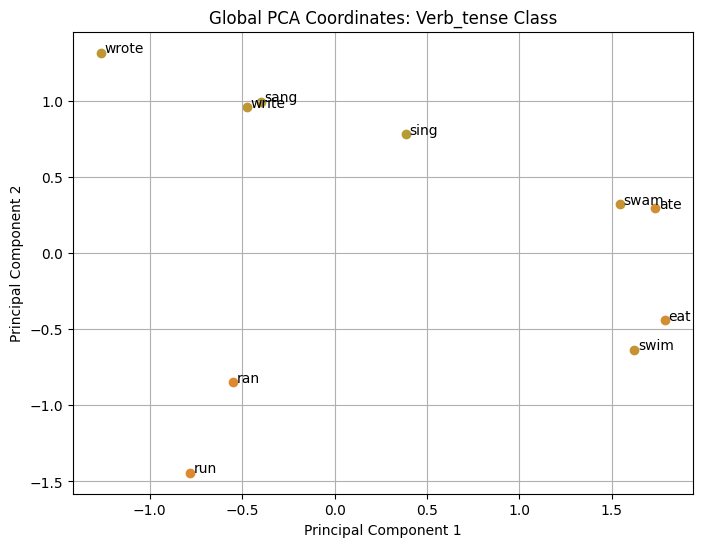

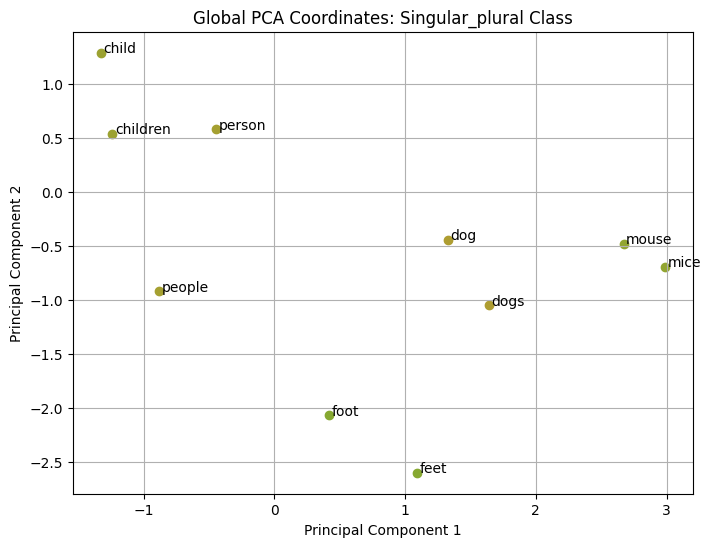

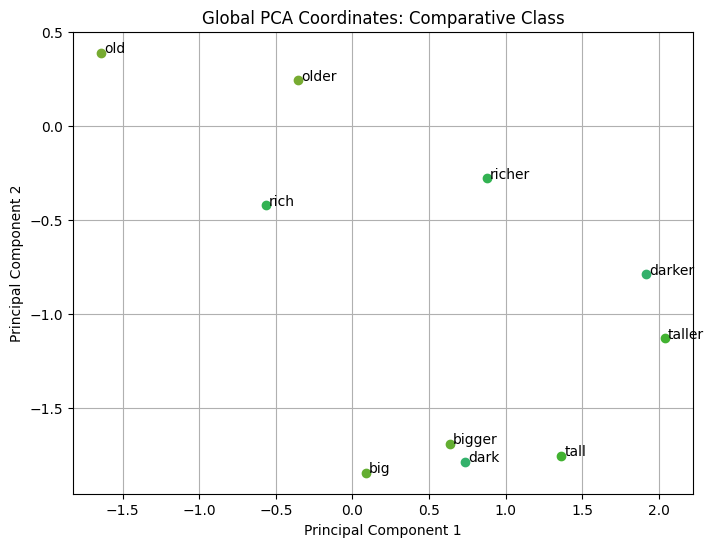

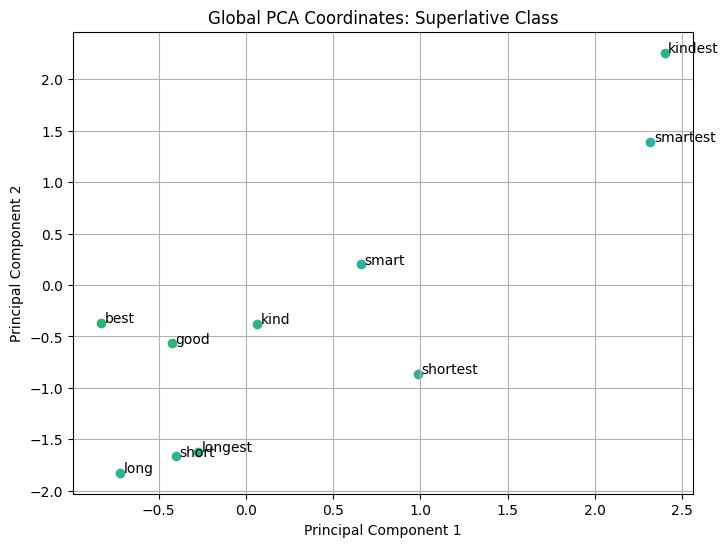

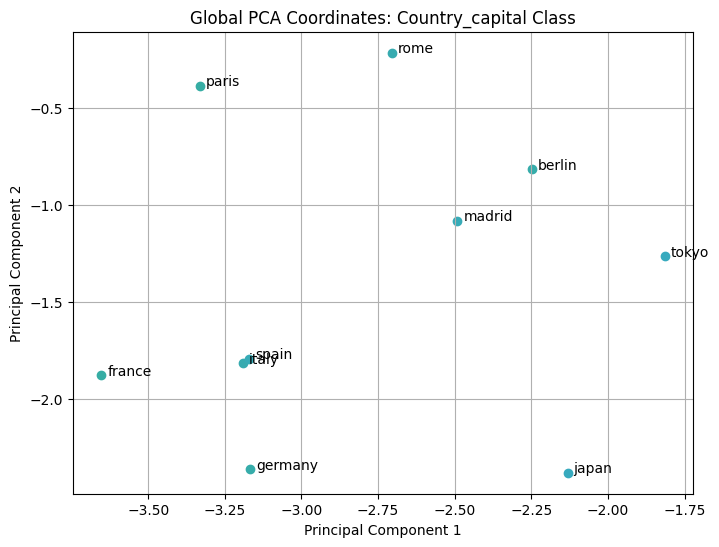

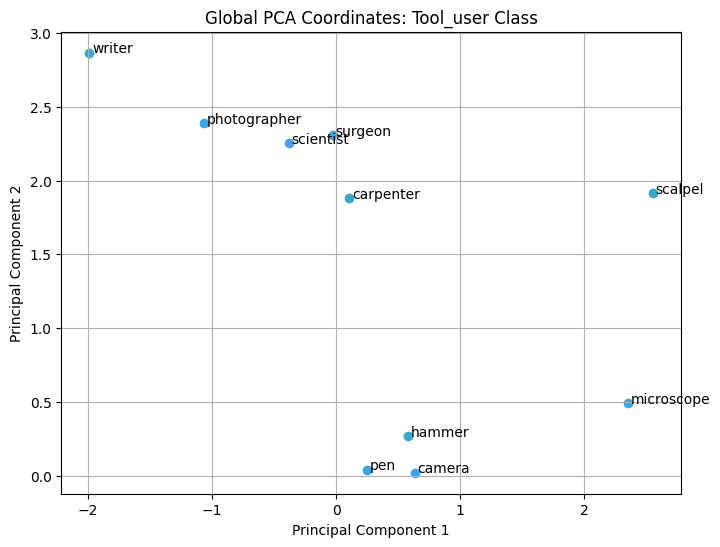

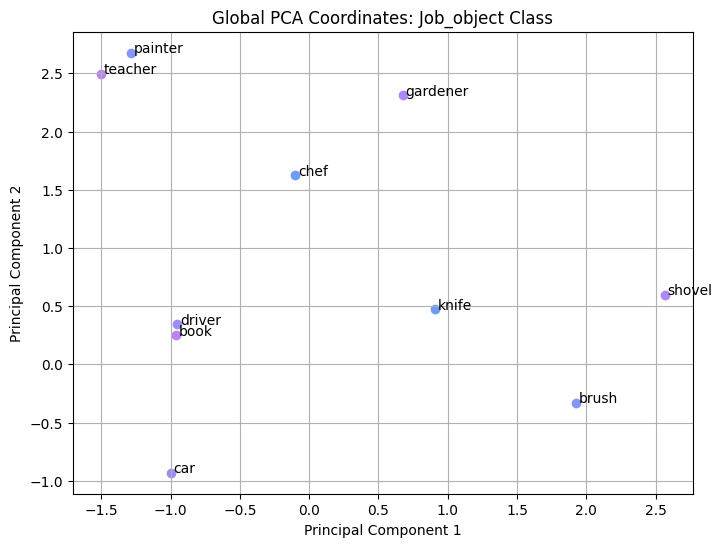

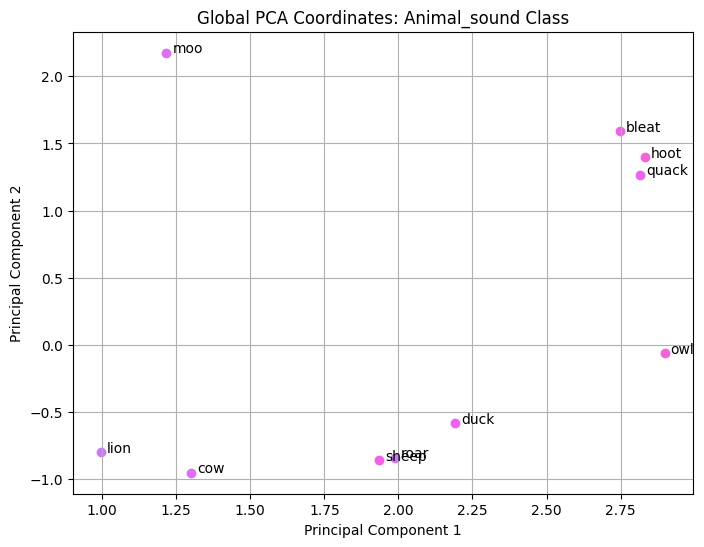

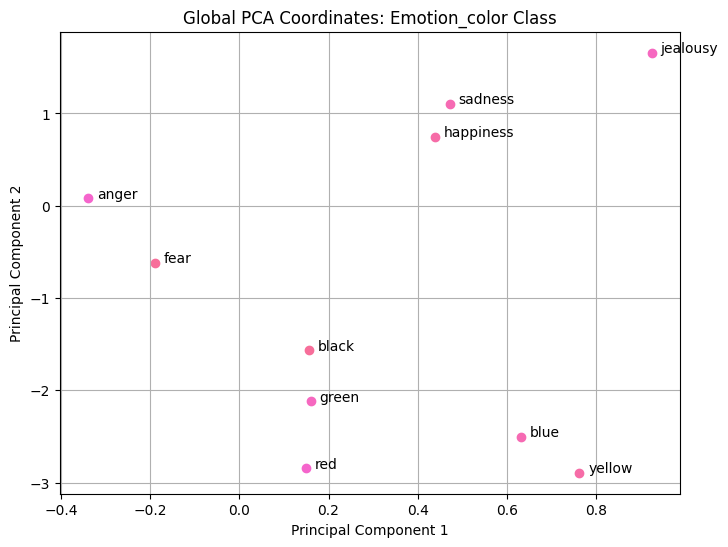

In [20]:
pair_idx = 0

word_to_pair_color = {}

for pairs in semantic_classes.values():
    for pair in pairs:
        color = pair_colors[pair_idx]
        word_to_pair_color[pair[0]] = color
        word_to_pair_color[pair[1]] = color
        pair_idx += 1

for class_name, pairs in semantic_classes.items():
    plt.figure(figsize=(8, 6))
    class_words = [word for pair in pairs for word in pair]

    for word in class_words:
        x, y = word_to_pca[word]
        plt.scatter(x, y, color=word_to_pair_color[word])
        plt.text(x + 0.02, y, word, fontsize=10)

    plt.title(f"Global PCA Coordinates: {class_name.capitalize()} Class")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()


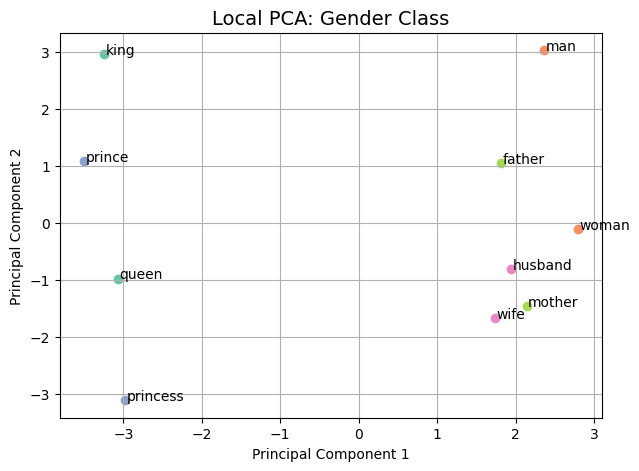

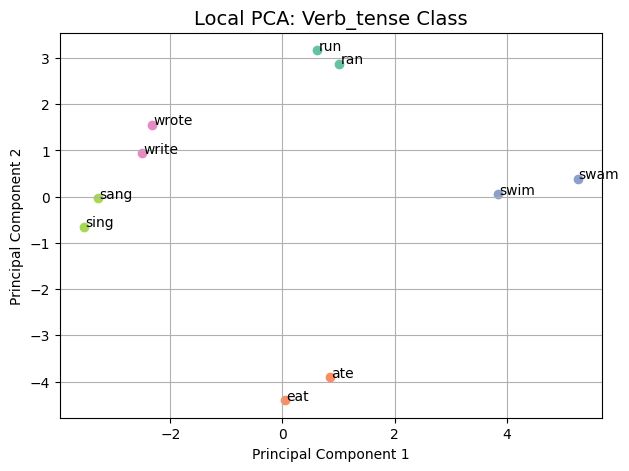

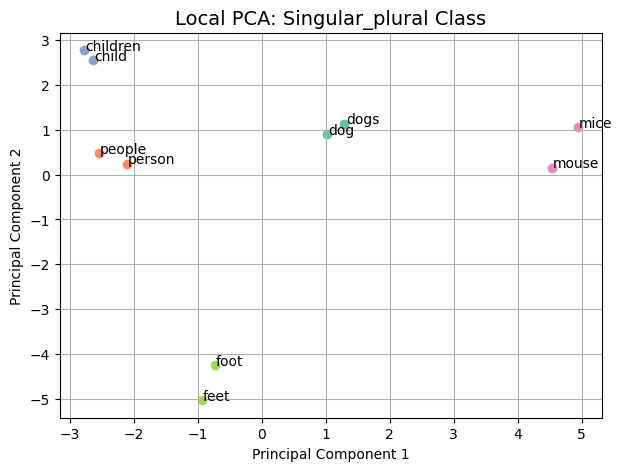

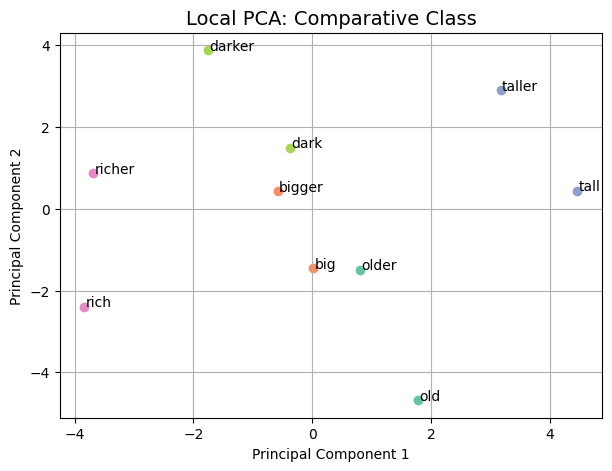

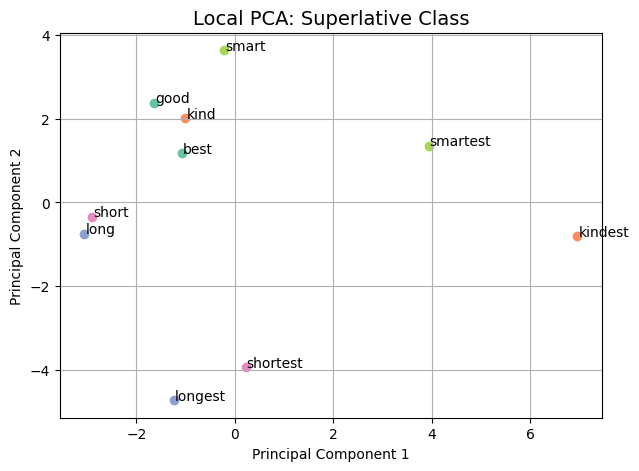

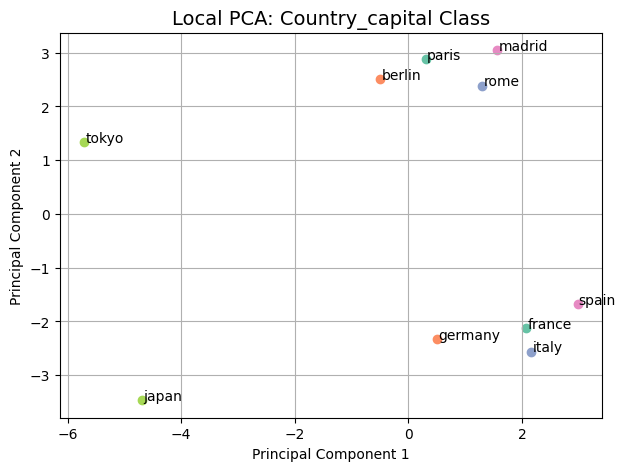

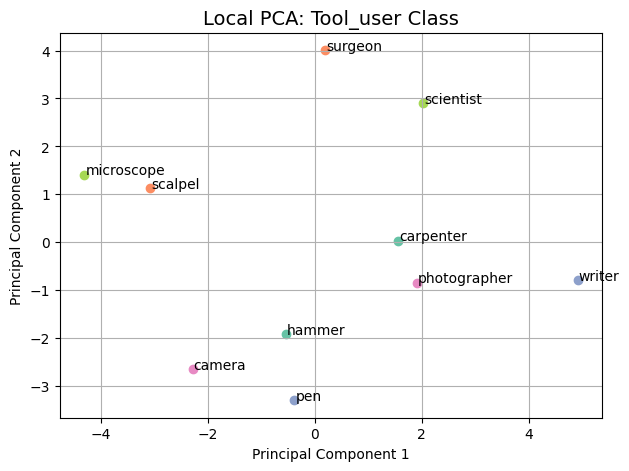

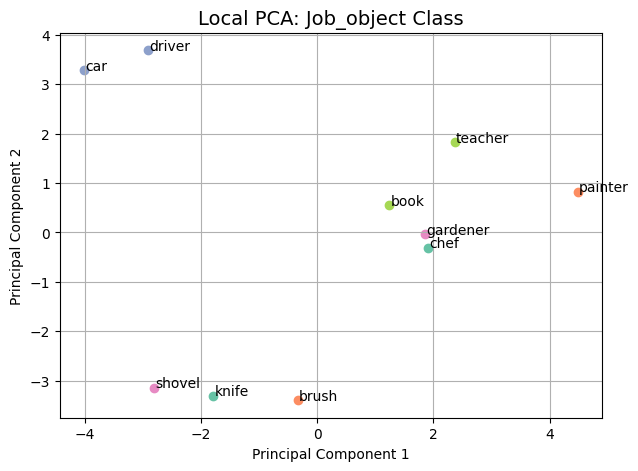

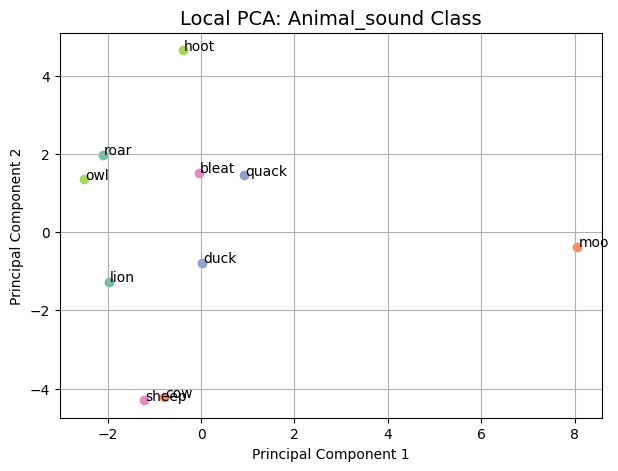

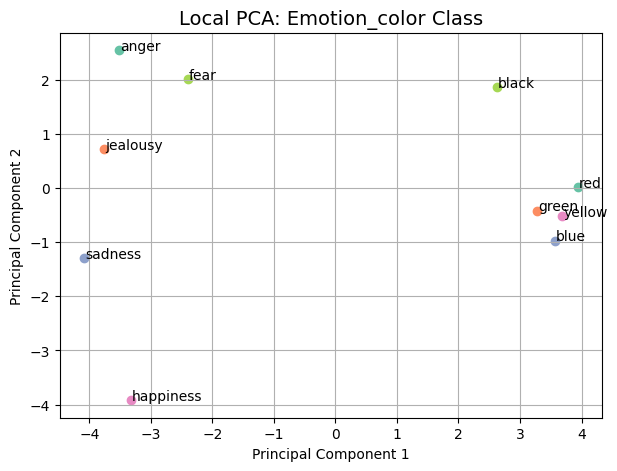

In [17]:
for class_name, pairs in semantic_classes.items():
    class_words = [word for pair in pairs for word in pair]
    class_vectors = np.array([word_vectors[word] for word in class_words])

    local_pca = PCA(n_components=2)
    reduced = local_pca.fit_transform(class_vectors)

    pair_colors = sns.color_palette("Set2", len(pairs))
    word_to_color = {}
    for i, (w1, w2) in enumerate(pairs):
        word_to_color[w1] = pair_colors[i]
        word_to_color[w2] = pair_colors[i]


    plt.figure(figsize=(7, 5))
    for i, word in enumerate(class_words):
        x, y = reduced[i]
        plt.scatter(x, y, color=word_to_color[word])
        plt.text(x + 0.02, y, word, fontsize=10)

    plt.title(f"Local PCA: {class_name.capitalize()} Class", fontsize=14)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()
